<a href="https://colab.research.google.com/github/rvmosquera/CS2201/blob/master/Colab_SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting the Effects of News Sentiments on the Stock Market

## Integrantes
- Nicho Galagarza, Jorge Ernesto 
- Mosquera Pumaricra, Raúl Vides 
- Vásquez Auqui, Fabrizio Jesús 

In [ ]:
# Data imports
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# # ML imports
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
#Link with Google Drive
URL = '/content/drive/'
from google.colab import drive
drive.mount(URL)

Mounted at /content/drive/


In [ ]:
path = URL + "My Drive/TesisProject/" #Depende de quien lo ejecuta: My Drive/02_Thesis/TesisProject/

In [ ]:
# read data
df = pd.read_csv(path + "apis/tweet_data.csv")

# sample data
df = df.sample(frac=1).reset_index(drop=True)

# clean tweet text
df['Text'] = df['Text'].apply(lambda x: x.lower())  # transform text to lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
print(df.shape)
df.head(10)

(5791, 2)


,Text,Sentiment
0,mge buying long 268 269,1
1,joe holding that 212150 area for now but longe...,1
2,schwing bingo nkd can i please sell my feb 8 1...,1
3,aa there goes the kids college fund,1
4,chdn ong 4902 trailing stop 5666 from 6 pr...,1
5,cat de in free fall,-1
6,disneys new infinity game is going to be huge ...,1
7,aap no buyers and no sellers less than 1m shar...,1
8,ed weekly triangle on amsnet profit 2613500 3...,-1
9,at least a quarter of the us economy has gone ...,-1


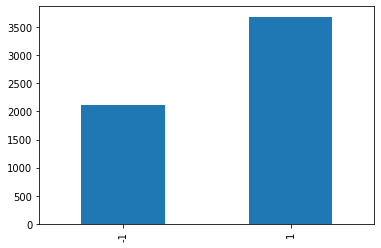

In [ ]:
df['Sentiment'].value_counts().sort_index().plot.bar()
plt.savefig(path + "images/single_count.png")

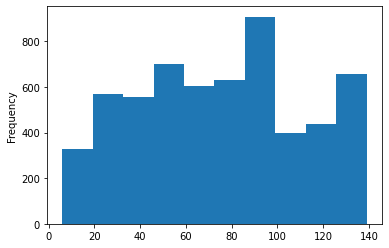

In [ ]:
df['Text'].str.len().plot.hist()
plt.savefig(path + "images/tweet_len.png")

In [ ]:
# X as tokenize data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['Text'].values)
X = tokenizer.texts_to_sequences(df['Text'].values)
X = pad_sequences(X)
print("X tokenized data = ", X[:5])

X tokenized data =  [[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 4809  144
    33 3241 4810]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0 2064  130   27 4811  432    7   35   31
  1778  142 4812]
 [   0    0    0    0    0    0    0    0    0    0    0 4813 1779  238
   111   15 1011  146   41  271  296 2065  207   27   15 1012  825    7
  2066   35 4814]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0  684  147  263    1
  2528 4815  422]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
  4816   71 4817  388   49 4818   19  272  433  246    6 4819 4820 4821
  4822 4823 4824]]


In [ ]:
# Y as buckets of Sentiment column
y = pd.get_dummies(df['Sentiment']).values
[print(df['Sentiment'][i], y[i]) for i in range(0, 5)]

1 [0 1]
1 [0 1]
1 [0 1]
1 [0 1]
1 [0 1]


[None, None, None, None, None]

In [ ]:
# lstm create model
model = Sequential()
model.add(Embedding(5000, 256, input_length=X.shape[1]))
model.add(Dropout(0.3))
model.add(GRU(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(GRU(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 31, 256)           1280000   
                                                                 
 dropout (Dropout)           (None, 31, 256)           0         
                                                                 
 gru (GRU)                   (None, 31, 256)           394752    
                                                                 
 gru_1 (GRU)                 (None, 256)               394752    
                                                                 
 dense (Dense)               (None, 2)                 514       
                                                                 
Total params: 2,070,018
Trainable params: 2,070,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
batch_size = 32
epochs = 8

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=2)

Epoch 1/8
145/145 - 41s - loss: 0.5826 - accuracy: 0.6952 - 41s/epoch - 281ms/step
Epoch 2/8
145/145 - 33s - loss: 0.3837 - accuracy: 0.8245 - 33s/epoch - 228ms/step
Epoch 3/8
145/145 - 33s - loss: 0.2250 - accuracy: 0.9119 - 33s/epoch - 231ms/step
Epoch 4/8
145/145 - 33s - loss: 0.1347 - accuracy: 0.9460 - 33s/epoch - 229ms/step
Epoch 5/8
145/145 - 34s - loss: 0.0788 - accuracy: 0.9685 - 34s/epoch - 232ms/step
Epoch 6/8
145/145 - 34s - loss: 0.0573 - accuracy: 0.9791 - 34s/epoch - 234ms/step
Epoch 7/8
145/145 - 33s - loss: 0.0380 - accuracy: 0.9855 - 33s/epoch - 228ms/step
Epoch 8/8
145/145 - 33s - loss: 0.0310 - accuracy: 0.9914 - 33s/epoch - 231ms/step


In [ ]:
predictions = model.predict(X_test)

In [ ]:
pos_count, neg_count = 0, 0
real_pos, real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1
    if np.argmax(y_test[i])==1:    
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)

print('Real neutral:', real_pos)
print('Real negative:', real_neg)

Positive predictions: 822
Negative predictions: 337
Real neutral: 749
Real negative: 410


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
print(history.history['loss'], )
predictions = [pos_count, neg_count]
real = [real_pos, real_neg]
labels = ['Positive', 'Negative']

[0.5826148390769958, 0.38365739583969116, 0.22496502101421356, 0.13471877574920654, 0.07884007692337036, 0.05730186030268669, 0.03802844509482384, 0.03104456700384617]


AttributeError: ignored

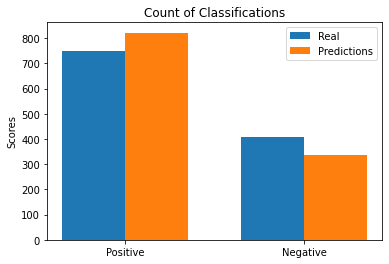

In [ ]:
x = np.arange(len(labels))
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, real, width, label='Real')
rects2 = ax.bar(x + width/2, predictions, width, label='Predictions')

ax.set_ylabel('Scores')
ax.set_title('Count of Classifications')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()
plt.savefig(path + "images/predictions_gru.png")
plt.show()

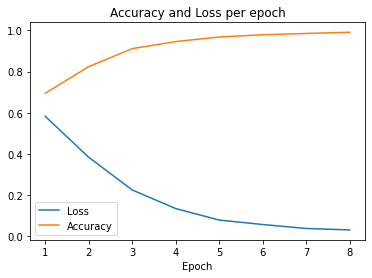

In [ ]:
fig, ax = plt.subplots()
loss = history.history['loss']
epoch = [item for item in range(1,9)]
accuracy = history.history['accuracy']
ax.plot(epoch, loss, label = "Loss")
ax.plot(epoch, accuracy, label = "Accuracy")

ax.set_xlabel('Epoch')
ax.set_title('Accuracy and Loss per epoch')
plt.legend()
plt.savefig(path + "images/epoch_gru.png")
plt.show()